Principal Component Analysis -PCA


In [1]:
#recuired Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#loading DATA Sets
data=pd.read_csv('green_transportation_system.csv')
data.head()

,energy_efficiency,co2_emissions,electric_vehicle_penetration,cost_efficiency,public_transport_usage
0,17.490802,106.046123,46.499916,2.095361,27.934722
1,29.014286,99.936814,19.225600,1.648231,15.689067
2,24.639879,76.423087,27.331985,2.911246,17.581553
3,21.973170,141.090001,43.164032,1.047446,20.840268
4,13.120373,121.493624,34.104467,1.969641,22.219200


In [3]:
data.shape

(10000, 5)

In [4]:
#normalize the data
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
print(pd.DataFrame(data_scaled,columns=data.columns).head())

   energy_efficiency  co2_emissions  ...  cost_efficiency  public_transport_usage
0          -0.415900      -0.452465  ...         0.482494               -0.684316
1           1.587377      -0.593258  ...        -0.136414               -1.389866
2           0.826917      -1.135149  ...         1.611824               -1.280827
3           0.363328       0.355146  ...        -0.968007               -1.093072
4          -1.175669      -0.096466  ...         0.308475               -1.013623

[5 rows x 5 columns]


In [6]:
#initialize PCA
pca=PCA()
#Fit PCA on the scaled data
pca.fit(data_scaled)
# Explained variance ratio for each principal component
print("Explained Variance ratio for each principle component")
print(pca.explained_variance_ratio_)

#cumulative explained valiance
print('\n cumulatie explained ratio')
print(np.cumsum(pca.explained_variance_ratio_))

Explained Variance ratio for each principle component
[0.20669281 0.20317681 0.2012694  0.19634014 0.19252083]

 cumulatie explained ratio
[0.20669281 0.40986962 0.61113902 0.80747917 1.        ]


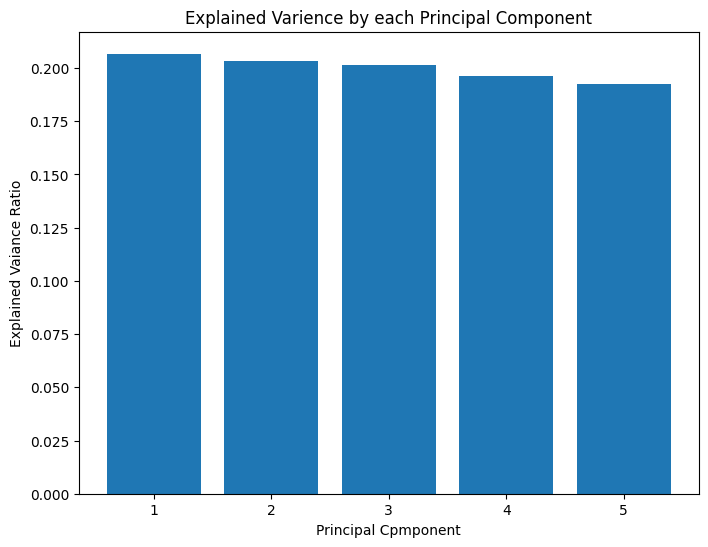

In [8]:
#plot the explained vaiance ratio
plt.figure(figsize=(8,6))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.title('Explained Varience by each Principal Component')
plt.xlabel('Principal Cpmponent')
plt.ylabel('Explained Vaiance Ratio')
plt.show()

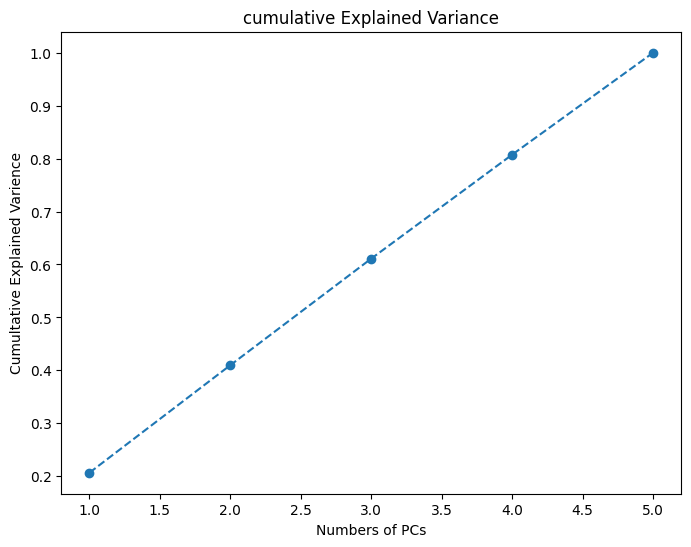

In [10]:
#cumulatice explained variance plot
plt.figure(figsize=(8,6))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_),marker='o',linestyle='--')
plt.title('cumulative Explained Variance')
plt.xlabel('Numbers of PCs')
plt.ylabel('Cumultative Explained Varience')
plt.show()

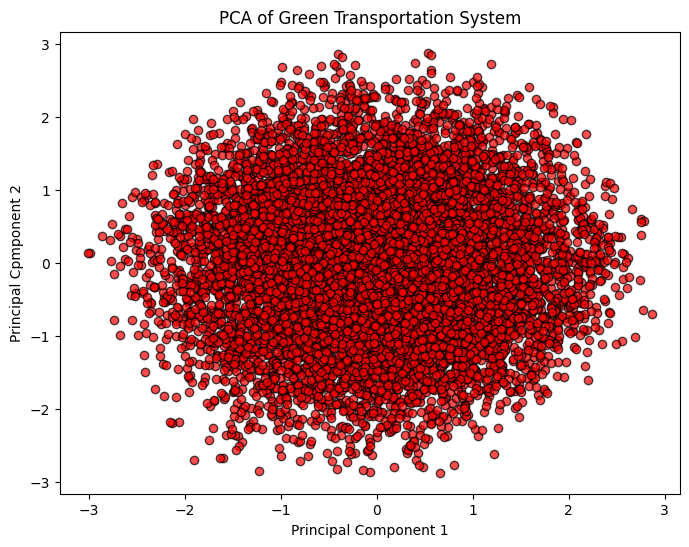

In [13]:
#project the data onto the first two Pcs
data_pca=pca.transform(data_scaled)
#create a dataframe for first two PCs
pca_df=pd.DataFrame(data_pca[:, :2],columns=['PC1','PC2'])
#visualise the data 2d space for 2 PCs
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='red', edgecolors='k', alpha=0.7)
plt.title('PCA of Green Transportation System')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Cpmponent 2')
plt.show()